## Churn Prediction

Predicting whether or not a customer is categorized as churn based on past transaction data. The dataset is acquired from http://buku.dioskurn.com/buku1/ch9/churnprediction_ch9.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv('churnprediction_ch9.csv')

In [3]:
df.head()

,customer_id,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn
0,285fae8412c4720a0c79d95f98434422,Kartu A,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0
1,f45bce87ca6bf100f222fcc0db06b624,Kartu A,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0
2,09b54557b1e2a10d998e3473a9ccd2a0,Kartu A,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0
3,11f252f48be36f93dd429f2ec86cb2f5,Kartu A,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0
4,a8df29ae9195eea348d2f74c967b978d,Kartu A,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  object 
 1   product      10000 non-null  object 
 2   reload_1     10000 non-null  float64
 3   reload_2     10000 non-null  float64
 4   video        10000 non-null  float64
 5   music        10000 non-null  float64
 6   games        10000 non-null  float64
 7   chat_1       10000 non-null  float64
 8   chat_2       10000 non-null  float64
 9   socmed_1     10000 non-null  float64
 10  socmed_2     10000 non-null  float64
 11  internet     10000 non-null  float64
 12  days_active  10000 non-null  int64  
 13  tenure       10000 non-null  int64  
 14  churn        10000 non-null  int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 1.1+ MB


In [5]:
churn=df.groupby('churn').count()

In [6]:
churn

,customer_id,product,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure
churn,,,,,,,,,,,,,,
0,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000,8000
1,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


([<matplotlib.patches.Wedge at 0x19ce006b490>,
 [Text(-0.8899187180267095, 0.6465637441936395, 'Aktif'),
  Text(0.8899187482945414, -0.6465637025335375, 'Churn')],
 [Text(-0.48541020983275057, 0.3526711331965306, '80%'),
  Text(0.4854102263424771, -0.3526711104728386, '20%')])

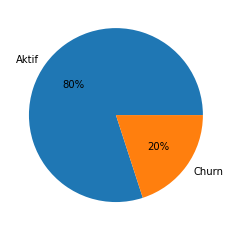

In [7]:
plt.pie(churn['customer_id'], labels=['Aktif', 'Churn'], autopct='%1.0f%%')

In [8]:
#use one hot encoding to turn 'product' column into numerical values

product=pd.get_dummies(df['product'], drop_first=True)

In [9]:
df=pd.concat([df,product], axis=1)

In [10]:
#drop the original 'product' column
df.drop('product', axis=1, inplace=True)

In [11]:
#new df
df.head()

,customer_id,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn,Kartu B,Kartu C
0,285fae8412c4720a0c79d95f98434422,27734.30,24381.32,22000.0,33009.9,25669.97,1716.0,2145.0,0.0,792.0,11000.0,15,776,0,0,0
1,f45bce87ca6bf100f222fcc0db06b624,26433.00,26515.50,0.0,0.0,0.00,0.0,15444.0,0.0,0.0,74151.0,13,352,0,0,0
2,09b54557b1e2a10d998e3473a9ccd2a0,93212.17,67101.83,0.0,0.0,0.00,86795.5,94649.5,330.0,1485.0,27467.0,15,1987,0,0,0
3,11f252f48be36f93dd429f2ec86cb2f5,183.33,1087.17,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,2,285,0,0,0
4,a8df29ae9195eea348d2f74c967b978d,95296.67,76246.50,0.0,0.0,11000.00,118800.0,104940.0,0.0,0.0,63855.0,15,1081,0,0,0


## Feature Selection

Here I use pearson correlation to eliminate features

In [12]:
df.corr()

,reload_1,reload_2,video,music,games,chat_1,chat_2,socmed_1,socmed_2,internet,days_active,tenure,churn,Kartu B,Kartu C
reload_1,1.000000,0.921328,0.124707,0.119497,0.138294,0.437082,0.509029,0.038242,0.043553,0.723312,0.125625,0.111676,-0.060128,0.003940,0.003543
reload_2,0.921328,1.000000,0.177122,0.164522,0.197651,0.548072,0.613124,0.056299,0.064593,0.741254,0.163847,0.158608,-0.069266,-0.001628,0.008209
video,0.124707,0.177122,1.000000,0.728816,0.889757,0.104861,0.077843,0.012046,0.009932,0.204017,0.154818,0.077655,-0.065324,-0.031338,0.031407
music,0.119497,0.164522,0.728816,1.000000,0.891254,0.095405,0.080401,0.010349,0.011209,0.181892,0.145409,0.067706,-0.044716,-0.014977,0.017092
games,0.138294,0.197651,0.889757,0.891254,1.000000,0.109749,0.088795,0.012143,0.012362,0.212477,0.147984,0.068572,-0.021367,-0.007909,0.002825
chat_1,0.437082,0.548072,0.104861,0.095405,0.109749,1.000000,0.814156,0.056554,0.064903,0.568202,0.194446,0.174225,-0.103881,-0.032182,0.039051
chat_2,0.509029,0.613124,0.077843,0.080401,0.088795,0.814156,1.000000,0.058112,0.074690,0.532345,0.182524,0.178391,-0.096341,-0.037027,0.043483
socmed_1,0.038242,0.056299,0.012046,0.010349,0.012143,0.056554,0.058112,1.000000,0.886667,0.049377,0.063699,0.062629,-0.037082,-0.020894,0.021935
socmed_2,0.043553,0.064593,0.009932,0.011209,0.012362,0.064903,0.074690,0.886667,1.000000,0.057697,0.054827,0.068785,-0.019986,-0.005920,0.004662
internet,0.723312,0.741254,0.204017,0.181892,0.212477,0.568202,0.532345,0.049377,0.057697,1.000000,0.190023,0.160670,-0.094807,-0.020116,0.030022


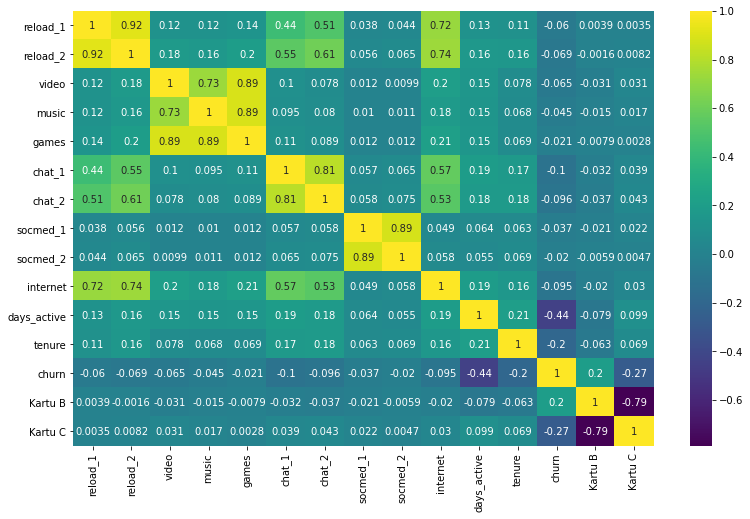

In [13]:
# use heatmap
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

From the heatmap above, we can see that reload_1 and reload_2 have a high correlation coefficient, so we're just gonna use one of them for the training process.

Do the same process with socmed_1 and socmed_2, music and games

In [14]:
#drop unused features
df2=df.drop(['reload_2', 'socmed_2', 'games', 'customer_id'], axis=1)

In [15]:
df2.head()

,reload_1,video,music,chat_1,chat_2,socmed_1,internet,days_active,tenure,churn,Kartu B,Kartu C
0,27734.30,22000.0,33009.9,1716.0,2145.0,0.0,11000.0,15,776,0,0,0
1,26433.00,0.0,0.0,0.0,15444.0,0.0,74151.0,13,352,0,0,0
2,93212.17,0.0,0.0,86795.5,94649.5,330.0,27467.0,15,1987,0,0,0
3,183.33,0.0,0.0,0.0,0.0,0.0,0.0,2,285,0,0,0
4,95296.67,0.0,0.0,118800.0,104940.0,0.0,63855.0,15,1081,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X=df2.drop('churn', axis=1)

In [18]:
y=df2['churn']

In [19]:
#for this project I use 25% of the dataset as a test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

## Building model from the dataset

We're gonna compare some machine learning method to predict whether a passenger survived or not using only train data

Some machine learning used here are: Logistic Regression, Random Forest, KNN, and Naive Bayes

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lm=LogisticRegression()

In [23]:
lm.fit(X_train, y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
lmpredict=lm.predict(X_test)

In [25]:
#check the model using confusion matrix and classification report
print(confusion_matrix(y_test,lmpredict))
print(classification_report(y_test,lmpredict))

[[2004    1]
 [ 489    6]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2005
           1       0.86      0.01      0.02       495

    accuracy                           0.80      2500
   macro avg       0.83      0.51      0.46      2500
weighted avg       0.81      0.80      0.72      2500



### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc=RandomForestClassifier()

In [28]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
rfcpredict=rfc.predict(X_test)

In [30]:
#check the model using confusion matrix and classification report
print(confusion_matrix(y_test,rfcpredict))
print(classification_report(y_test,rfcpredict))

[[1916   89]
 [ 114  381]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2005
           1       0.81      0.77      0.79       495

    accuracy                           0.92      2500
   macro avg       0.88      0.86      0.87      2500
weighted avg       0.92      0.92      0.92      2500



### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier

Use elbow method to determine the optimal n number for the KNN model

In [32]:
err_rate=[]

for i in range (1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    err_rate.append(np.mean(pred_i != y_test))

([<matplotlib.axis.XTick at 0x19ce2438670>,
 <a list of 49 Text major ticklabel objects>)

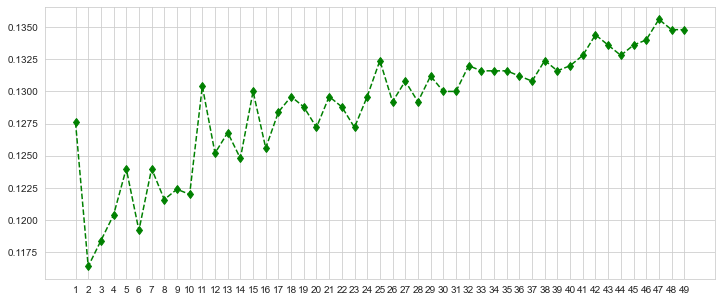

In [33]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')
plt.plot(range(1,50),err_rate, color='green', marker='d', ls='--')
plt.xticks(np.arange(1,50,1))

From the figure above, we can see that the optimal number is 2

In [34]:
knn=KNeighborsClassifier(n_neighbors=2)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [36]:
knnpredict=knn.predict(X_test)

In [37]:
#check the model using confusion matrix and classification report
print(confusion_matrix(y_test,lmpredict))
print(classification_report(y_test,knnpredict))

[[2004    1]
 [ 489    6]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2005
           1       0.81      0.54      0.65       495

    accuracy                           0.88      2500
   macro avg       0.85      0.75      0.79      2500
weighted avg       0.88      0.88      0.87      2500



### Naive Bayes (Gaussian)

In [38]:
from sklearn.naive_bayes import GaussianNB

In [39]:
gnb=GaussianNB()

In [40]:
gnb.fit(X_train, y_train)

GaussianNB()

In [41]:
gnbpredict=gnb.predict(X_test)

In [42]:
#check the model using confusion matrix and classification report
print(confusion_matrix(y_test,gnbpredict))
print(classification_report(y_test,gnbpredict))

[[ 653 1352]
 [  15  480]]
              precision    recall  f1-score   support

           0       0.98      0.33      0.49      2005
           1       0.26      0.97      0.41       495

    accuracy                           0.45      2500
   macro avg       0.62      0.65      0.45      2500
weighted avg       0.84      0.45      0.47      2500



So all in all, we can see that <strong> random forest classifier </strong> is the best model for this case with accuracy score of 93%, precision score 94% and recall score 97%.

## Thank You